# Probabilidade e amostragem
---

## Distribuição binomial

In [27]:
# Importando módulos gerais
import pandas as pd
import numpy as np

In [36]:
# Função para cálculo de combinações
from scipy.special import comb

# Calculando a chance de se ganhar na mega-sena
jogos_possiveis = comb(60, 6)
probabilidade_de_sucesso = 1 / jogos_possiveis

print('A probabilidade de ganhar na mega-sena é de 1 em %d' % jogos_possiveis)
print('ou de %.6f%%' % (probabilidade_de_sucesso * 100))

A probabilidade de ganhar na mega-sena é de 1 em 50063860
ou de 0.000002%


In [43]:
# Função para cálculo de distribuições binomiais
from scipy.stats import binom

# Definindo o número de questões e a probabilidade de sucesso em cada
n = 10
p = 1 / 3

# Calculo da chance do participante acertar 5 questões
print('A probabilidade do participante acertar 5 questões é de %.2f%%' % (binom.pmf(5, n, p) * 100))

# Calculo de chance do participante ser aprovado
print('A probabilidade do participante ser aprovado é de %.2f%%' % (binom.sf(4, n, p) * 100))

A probabilidade do participante acertar 5 questões é de 13.66%
A probabilidade do participante ser aprovado é de 21.31%


In [56]:
# Quantas equipes serão formadas por 8 mulheres
p = 0.6
n = 12
k = 8

# Cálculo da probabilidade uma equipe ter 8 mulheres
print('A chance de uma equipe ter 8 mulheres é de %.2f%%' % (binom.pmf(k, n, p) * 100))

# Cálculo de quantas equipes terão 8 mulheres
equipes = round(30 * binom.pmf(k, n, p))
print('De 30 equipes, %d terão 8 mulheres' % equipes)

A chance de uma equipe ter 8 mulheres é de 21.28%
De 30 equipes, 6 terão 8 mulheres


## Distribuição poisson

In [58]:
# Definindo o número de euler
e = np.e

In [80]:
# Função para cálculo de distribuições poisson
from scipy.stats import poisson

# Cálculo da chance do restaurente receber 15 pedidos em uma hora
print('A probabilidade do restaurante receber 15 pedidos em uma hora é de %.2f%%' % (poisson.pmf(15, 20) * 100))

A probabilidade do restaurante receber 15 pedidos em uma hora é de 5.16%


## Distribuição normal

In [108]:
# A probabilidade das alturas
u = 1.7
s = 0.1
z1 = (1.8 - u) / s
z2 = (1.6 - u) / s
z3 = (1.9 - u) / s

from scipy.stats import norm

print('A probabilidade de alguém ter menos de 1,80 metros é de %.2f%%' % (norm.cdf(z1) * 100))
print('A probabilidade de alguém ter entre 1,60m e 1,80 é de %.2f%%' % ((norm.cdf(z1) - norm.cdf(z2)) * 100))
print('A probabilidade de alguém ter mais de 1,90m é de %.2f%%' % ((1 - norm.cdf(z3)) * 100))

A probabilidade de alguém ter menos de 1,80 metros é de 84.13%
A probabilidade de alguém ter entre 1,60m e 1,80 é de 68.27%
A probabilidade de alguém ter mais de 1,90m é de 2.28%


## Técnicas de amostragem

In [112]:
# Observações do dataset
df.shape[0]

76840

In [115]:
# Renda média do dataset
df['Renda'].mean()

2000.3831988547631

In [118]:
# Extraindo uma amostra do dataset
amostra = df.sample(n = 100, random_state = 101)

# Renda média da amostra
amostra['Renda'].mean()

2150.85

In [121]:
# Números de homens e de mulheres do dataset
df['Sexo'].value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [122]:
# Número de homens e mulheres da amostra
amostra['Sexo'].value_counts(normalize = True)

0    0.69
1    0.31
Name: Sexo, dtype: float64

## Nível de intervalo de confiança

In [147]:
import warnings
warnings.filterwarnings('ignore')

# Coletando amostras de idade aleatorias da população
n = 1500
total_de_amostras = 2000

amostras = pd.DataFrame()

for i in range(total_de_amostras):
    _ = df['Idade'].sample(n)
    _.index = range(0, len(_), 1)
    
    amostras['Amostra_' + str(i)] = _
amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1990,Amostra_1991,Amostra_1992,Amostra_1993,Amostra_1994,Amostra_1995,Amostra_1996,Amostra_1997,Amostra_1998,Amostra_1999
0,57,52,50,41,52,62,31,52,31,66,...,39,46,44,51,59,25,53,21,40,67
1,60,21,34,48,74,32,30,25,37,25,...,33,48,51,52,44,47,31,27,57,44
2,55,50,36,30,27,57,55,64,42,65,...,35,63,20,42,47,40,51,43,41,59
3,39,49,41,37,47,41,39,53,40,27,...,67,24,33,21,54,53,60,65,45,41
4,31,33,42,40,35,58,35,42,40,53,...,55,45,52,57,35,30,42,41,37,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,32,39,28,37,21,46,52,42,40,39,...,71,25,41,37,38,29,61,63,54,58
1496,51,21,46,40,35,61,34,69,49,48,...,26,22,63,49,57,45,35,50,47,33
1497,59,30,49,34,52,51,32,40,60,49,...,45,57,46,43,37,56,54,48,58,62
1498,47,60,57,69,50,43,23,39,38,39,...,44,54,64,54,23,65,42,45,27,21


In [148]:
# Média das amostras
amostras.mean()

Amostra_0       44.302667
Amostra_1       43.970000
Amostra_2       44.168000
Amostra_3       43.763333
Amostra_4       44.031333
                  ...    
Amostra_1995    44.540667
Amostra_1996    43.858000
Amostra_1997    44.050667
Amostra_1998    43.945333
Amostra_1999    44.482000
Length: 2000, dtype: float64

<AxesSubplot: >

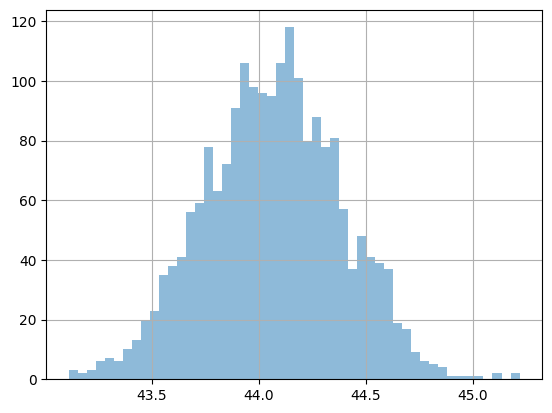

In [149]:
# Histograma das médias das amostras (se aproxima de uma distribuição normal)
amostras.mean().hist(bins = 50, alpha = 0.5)

In [150]:
# Média das idades da população
df['Idade'].mean()

44.07142113482561

In [151]:
# Média das médias das amostras
amostras.mean().mean()

44.067220999999996

In [152]:
# Desvio padrão das médias das amostras
amostras.mean().std()

0.3188555288054318

In [155]:
# Desvio padrão das médias das amostras aplicando a fórmula
df['Idade'].std() / np.sqrt(n)

0.32224727941526615

In [159]:
amostras_renda = pd.DataFrame()

for i in range(total_de_amostras):
    _ = df['Renda'].sample(n)
    _.index = range(0, len(_), 1)
    amostras_renda['Amostra_' + str(i)] = _
amostras_renda

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1990,Amostra_1991,Amostra_1992,Amostra_1993,Amostra_1994,Amostra_1995,Amostra_1996,Amostra_1997,Amostra_1998,Amostra_1999
0,600,900,3200,3000,2364,480,0,1500,600,200,...,2300,788,1300,900,1300,900,1500,788,500,916
1,0,1600,1500,600,6000,209,1576,3000,2500,1300,...,1200,818,1000,1100,300,1000,480,1400,2300,600
2,200,2000,788,1500,2800,1150,1100,1270,2500,100,...,1900,3500,3000,2500,2000,3940,788,17000,1900,800
3,5000,2000,1200,2000,788,2200,1600,1200,1000,160,...,1500,4000,6000,1600,3500,864,2000,1100,1400,1000
4,2000,400,1092,788,1250,2800,600,1600,3400,1500,...,1000,1200,4000,4200,10000,1100,1400,400,3180,3937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2700,500,2000,800,3400,1000,900,1200,1040,2000,...,0,15000,15000,3500,600,150,1400,788,788,788
1496,3500,2800,788,1280,3000,2000,1500,0,1200,1000,...,2000,500,1500,1700,1200,2000,500,968,950,1000
1497,6000,12000,3000,1800,1200,849,200,2000,1500,800,...,600,3500,400,788,1000,1800,4000,200,1700,1500
1498,3000,1170,2000,1100,2300,3600,2200,788,2400,1000,...,1260,22000,12000,15000,280,788,1200,4000,30000,900


<AxesSubplot: >

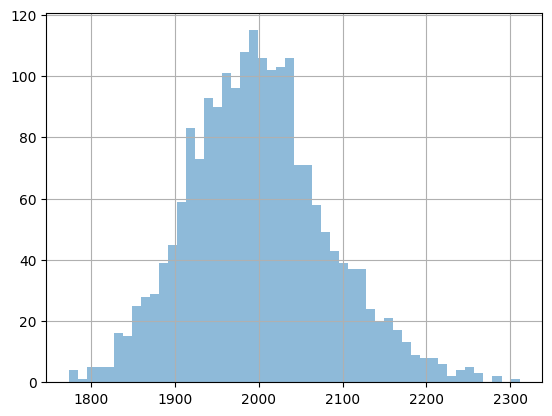

In [162]:
amostras_renda.mean().hist(bins = 50, alpha = 0.5)

## Cálculo da população infinita

In [164]:
norm.ppf(0.95)

1.6448536269514722